In [1]:
# Volume & heat transport of the exchange flow or
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

array([[[ 0.0000000e+00,  0.0000000e+00,  1.2556148e-01, ...,
          3.8398975e-01,  3.7037088e-03,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  1.7729101e-01, ...,
          3.8343883e-01,  3.7037088e-03,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  2.6717985e-01, ...,
          3.8216498e-01,  3.7037088e-03,  0.0000000e+00],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  2.6717985e-01, ...,
          3.8216498e-01,  3.7037088e-03,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  1.7729101e-01, ...,
          3.8343883e-01,  3.7037088e-03,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  1.2556148e-01, ...,
          3.8398975e-01,  3.7037088e-03,  0.0000000e+00]],

       [[ 0.0000000e+00,  0.0000000e+00,  1.3448158e-01, ...,
          3.9246997e-01,  3.7037088e-03,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  1.8709040e-01, ...,
          3.8915357e-01,  3.7037088e-03,  0.0000000e+00],
        [ 0.0000000e+00, 

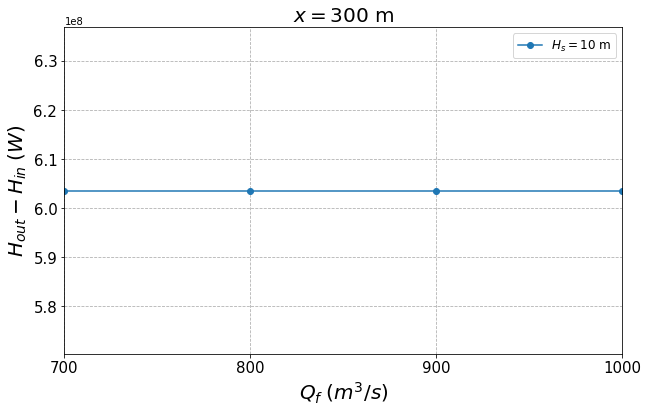

In [4]:
Hs = [10] # Sill depth
Qf = np.linspace(700, 1000, 4) # Freshwater discharge

Cp = 4220  # Specific heat content J/kg/C
rho = 1025 # Density

# Grid areas
Area = np.empty([50, 9])
Area[:10,:] = 100
Area[10:20,:] = 200
Area[20:30,:] = 300
Area[30:40,:] = 800
Area[40:,:] = 1600

# Two-panel plot
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
#ax1.set_ylabel('$V_{in} \; (m^3/s)$',size=15)
#ax1.set_xlabel('$Q_{f} \; (m^3/s)$',size=15)
#ax1.set_xlim([700, 1000])
#ax1.set_xticks(Qf)
#ax2.set_ylabel('$H_{in} \; (W)$',size=15)
#ax2.set_xlim([700, 1000])
#ax2.set_xlabel('$Q_f \; (m^3/s)$',size=15)
#ax2.set_xticks(Qf)

fig, ax =plt.subplots(figsize=(10,6))
ax.set_xlim([700, 1000])
ax.set_xticks(Qf)
plt.grid(linestyle='--')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('$Q_f\;(m^3/s)$', size=20)
plt.ylabel('$H_{out}-H_{in}\;(W)$', size =20)
xloc = 1
plt.title('$x = $'+str(200*xloc+100)+' m', size=20)


for s in range(len(Hs)):
    files = sorted(glob.glob('/Users/weiyangbao/Desktop/State/' + str(format(Hs[s],'03d')) + '/state*.nc'))
    Vout = np.empty(len(files))
    Vin = np.empty(len(files))
    Hout = np.empty(len(files))
    Hin = np.empty(len(files))
    Hnet = np.empty(len(files))
    for i in range(len(files)):
        state0 = xr.open_dataset(files[3])
        t0 = 60 # Start from day 30
        tn = len(state0.T) # End day
        state = state0.isel(Y=range(1,10), T=range(t0,tn)) # Remove the boundary walls in y direction
        u0 = state.U.data.mean(0)
        u = (u0[:, :, 1:] + u0[:, :, :-1]) / 2
        u_s = u[:,:,1] # Along-fjord velocity at xloc
        T_s = state.Temp.isel(X=1).data.mean(0) # Potential temperature at xloc
        Vex = u_s * Area # Volume transport
        Hex = Vex * T_s * Cp * rho # Heat transport
        #Vout[i] = Vex[Vex > 0].sum()
        #Vin[i] = Vex[Vex < 0].sum()
        #Hout[i] = Hex[Hex > 0].sum()
        #Hin[i] = Hex[Hex < 0].sum()
        Hnet[i] = Hex.sum()
    plt.plot(Qf,Hnet,'o-', lw=1.5, label='$H_s=$' + str(Hs[s]) +' m')
    plt.legend(loc='best', fontsize=12)
    
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Transport/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
#fig.savefig(fig_path + '/DeltaH'+str(xloc)+'.png', dpi = 150, bbox_inches='tight')
u0